### Решение модельного уравнения

Необходимо решить модельное уравнение:
$$
\begin{align}
\label{eq:dalq}
u'(t) = \lambda u(t)
\end{align}
$$
с начальным условием $u(0) = 1$ с помошью явного и неявного метода Эйлера. Считать, что $\lambda = -200$. Провести расчеты на сетке с числом узлов $N = 1001; 101; 100$. Построить графики решения на одном рисунке, объяснить результат. А именно объяснить, что мы видим на графике для каждого случая, какое это имеет отношение к А-устойчивости, почему именно так. Если поведение графиков отличается, объяснить чем вызвано отличие.

(0.0, 0.1, -1.1, 1.1)

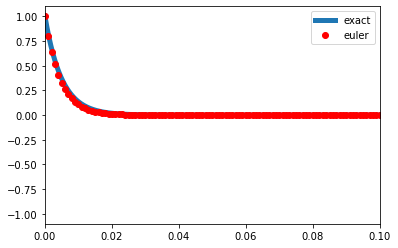

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#для модельного уравнения
#explicit Euler method
def ex_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = (1+l*h)*u[i]

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        # TODO : реализуйте неявный метод Эйлера для модельного уравнения
        u[i + 1] = u[i] / (1 - l * h)
        
T = 1 # считаем до этого момента
N = 1001
h = T/(N-1)
x = np.linspace(0,T,N) # сетка
x_teor = np.linspace(0,T,(N-1)*100+1) # сетка для точного решения
l = -200

u = np.zeros(N)
u[0] = 1 #начальное условие
ex_euler(u, l, h, N)
#im_euler(u, l, h, N)

plt.plot(x_teor, np.exp(l*x_teor), linewidth=5.0, label='exact')
plt.plot(x, u, 'ro', label='euler')
plt.legend()
plt.axis([0, 0.1, -1.1, 1.1])

<Figure size 1224x360 with 0 Axes>

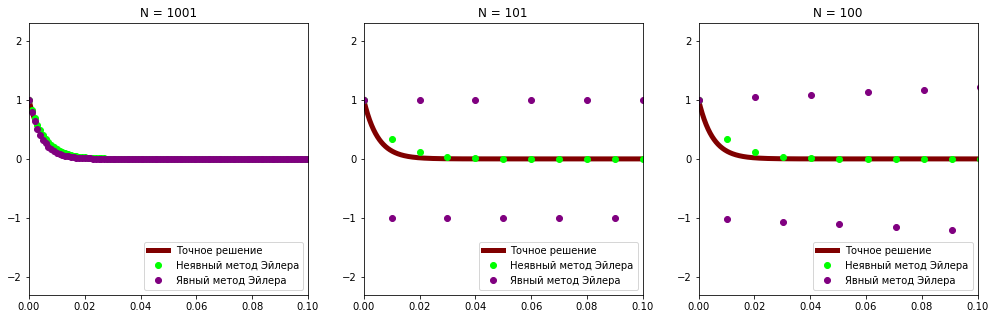

In [49]:
# Построение графиков

N = [1001, 101, 100]
plt.figure(figsize(17, 5))
fig, axs = plt.subplots(1, len(N) + 1)
for i in range(len(N)):
    T = 1 # считаем до этого момента
    h = T / (N[i] - 1)
    x = np.linspace(0,T,N[i]) # сетка
    x_teor = np.linspace(0, T, (N[i] - 1) * 100 + 1) # сетка для точного решения
    l = -200
    u = np.zeros(N[i])
    v = np.zeros(N[i])
    u[0] = 1 #начальные условия
    v[0] = 1

    ex_euler(v, l, h, N[i])
    im_euler(u, l, h, N[i])
    
    plt.subplot(1, 3, i + 1)
    plt.plot(x_teor, np.exp(l * x_teor), linewidth=5.0, label='Точное решение', color='maroon')
    plt.plot(x, u, 'o', color='lime', label='Неявный метод Эйлера')
    plt.plot(x, v, 'o', color='purple', label='Явный метод Эйлера')
    plt.title('N = {}'.format(N[i]))
    plt.legend(loc='lower right')
    plt.axis([0, 0.1, -2.3, 2.3])
    
plt.show()    

На графиках представлены характеры сходимости для неявного и явного метода Эйлера в зависимости от размера сеточного шага (для нашего модельного уравнения). На первом графике оба метода сходятся, а на втором и третьем явный метод расходится, неявный - сходится.

Такие результаты согласуются с тем, что неявный метод А-устойчив в отличие от явного. На семинаре мы нашли радиус сходимости для нашего модельного уравнения (вся плоскость кроме круга радиуса 1 с центром в (-1, 0)) и то, что устойчивость пропадает при N=100. Как раз при таком N амплитуда точек (локальная ошибка) остаётся постоянной; для N=101 (находимся вне области сходимости), она накапливается с каждым шагом, поэтому и амплитуда точек увеличивается; а при N=1001 мы находимся в области сходимости, поэтому нет зависимости от сеточного шага.

### L-устойчивость

Рассматриваем задачу $u' = l(u-cos(t)) - sin(t)$. Для начального условия $u(0) = 1$ решение $u(t) = cos(t)$. Для начального условия  $u(0) = g$ решение $u(t) = e^{lt}(g-1) + cos(t)$. Решите задачу на сетке с шагом $h = 0.1$ для начального условия $u(0) = 1$ и $u(0) = 1.5$ методом Эйлера и методом трапеции. В качестве решения постройте две картинки для разных начальных условий. На каждой картинке должно быть два графика для каждого из методов и сравнение с точным решением. Объясните получившиеся результаты. Как они согласуются с теорией? При чем тут L-устойчивость? 

Метод трапеции $$ \frac{u_{n+1} - u_n}{h} = \frac{f(t_n, u_n)+f(t_{n+1}, u_{n+1})}{2}. $$


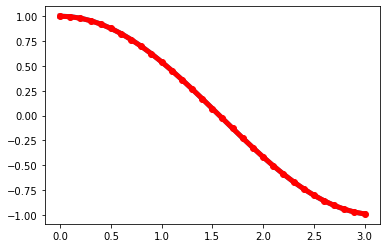

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        # TODO : реализуйте неявный метод Эйлера для рассматриваемой задачи
        u[i + 1] = (u[i] - h * l * np.cos((i + 1) * h) - np.sin((i + 1) * h)) / (1 - h * l)  

#trapezoidal method
def trapezoidal(u, l, h, N):
    for i in range(0, N-1):
        free = l*(np.cos((i+1)*h)+np.cos(i*h))+(np.sin((i+1)*h)+np.sin(i*h))
        u[i+1] = (u[i]*(1+l*h/2)-h/2*free)/(1-l*h/2)

T = 3
N = 31
h = T/(N-1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)
l = -1e6

u = np.zeros(N)
#initial condition
u[0] = 1
#u[0] = 1.5

#method
#im_euler(u, l, h, N)
trapezoidal(u, l, h, N)

# TODO: добавьте легенду на графики
plt.plot(x_teor, np.cos(x_teor),  x, u, '-ro', linewidth=5.0)

<Figure size 1152x360 with 0 Axes>

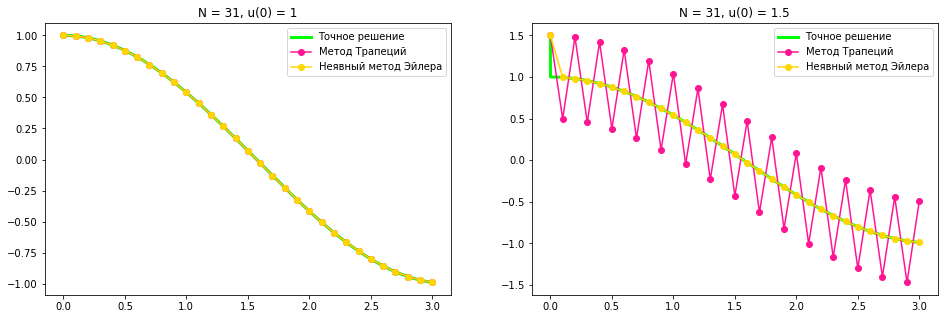

In [61]:
# графики

u0 = [1, 1.5]
u = np.zeros(N)

plt.figure(figsize(17, 5))
fig, axs = plt.subplots(1, len(u0) + 1)
for i in range(len(u0)):
    T = 3
    N = 31
    h = T / (N - 1)
    x_teor = np.linspace(0, T, (N - 1) * 100 + 1) 
    x = np.linspace(0, T, N)
    l = -1e6
    u = np.zeros(N)
    v = np.zeros(N)
    u[0] = u0[i]
    v[0] = u0[i]
    trapezoidal(v, l, h, N)
    im_euler(u, l, h, N)
    plt.subplot(1, 2, i + 1)
    plt.plot(x_teor, np.cos(x_teor) + (u[0] - 1) * np.exp(l * x_teor), color='lime', label='Точное решение', linewidth=3.0)
    plt.plot(x, v, marker='o', color='deeppink', label='Метод Трапеций')
    plt.plot(x, u, marker='o', color='gold', label='Неявный метод Эйлера')
    plt.title('N = 31, u(0) = {}'.format(u0[i]))
    plt.legend()
plt.show() 

Из построенных графиков видно, что неявный метод Эйлера сходится в обоих случаях, а метод трапеций только в первом (во втором он осциллирует около точного решения). 

Это согласуется с тем, что неявный метод Эйлера является L-устойчивым: он А-устойчив и $\lim\limits _{z\to\infty}R(z) = 0\Rightarrow$ метод сходится.

Для метода же трапеций, несмотря на то что он А-устойчив, из задачи с семинара было установлено, что $\lim\limits _{z\to\infty}R(z) = \lim\limits _{z\to\infty}\frac{2 + z}{2 - z}\neq 0\Rightarrow$ он не является L-устойчивым и мы получаем осциллирующее решение (т.е. сходимость метода трапеций зависит от начальных условий).